# Compare Standard and Distributionally Robust Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import argparse

## Generate Training and Test Data

In [2]:
# Set number of samples
N = 500
N_test = 100
# Set the dimension
d = 50

# Noise parameter
noise_param = 0.01

# Generate ground truth theta_ground_truth
theta_ground_truth = np.random.randn(d, 1)

# Generate training data matrix X_train
X_train = np.random.randn(N, d)
# Generate outputs y_train
y_train = np.sign(X_train @ theta_ground_truth + noise_param * np.random.randn(N, 1))

# Generate training data matrix X_train
X_test = np.random.randn(N_test, d)
# Generate outputs y_train
y_test = np.sign(X_test @ theta_ground_truth + noise_param * np.random.randn(N_test, 1))


# Adding one more dimension for the bias term
X_train_aug = np.concatenate((X_train, np.ones((N, 1))), axis=1)
X_test_aug = np.concatenate((X_test, np.ones((N_test, 1))), axis=1)

## Standard Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=10.0, random_state=0).fit(X_train_aug, y_train)
# Where C is equal to the inverse of the L2 regularization, i.e., logistic loss + (1/C) * L2 regularization
print('Standard Logistic Regression Classification accuracy: {}%'.format(100. *clf.score(X_test_aug, np.squeeze(y_test, axis=1))))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Standard Logistic Regression Classification accuracy: 99.0%


## Distributionally Robust Logistic Regression

X_train shape:  (500, 51)
y_train shape:  (500, 1)
y values:  [-1.  1.]
DRO parameter: kappa=1.0, epsilon=0.1
finished training


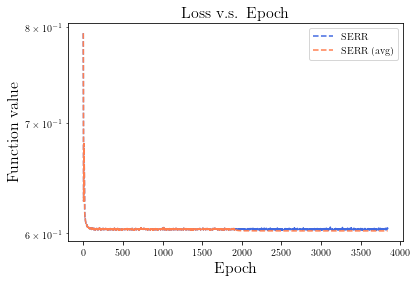

0.6041466933060113
Distributionally Robust Logistic Regression Classification accuracy: 93.0%


In [6]:
from SEG_randomreshuffle import dro_solver
beta_dro, plot_n, dro_losses, dro_losses_bar = dro_solver(X_train_aug, 
                                                          y_train, 
                                                          kappa=1.0, 
                                                          epsilon=0.1, 
                                                          eta=0.1, 
                                                          batch_size=128, 
                                                          EPOCH=5000)
# where we describe the hyper parameters as follows:
# kappa - kappa parameter in DRO
# epsilon - epsilon parameter in DRO
# eta - step size
# batch size - mini-batch size 
# EPOCH - number of epochs for optimizing the DRO objective


print('finished training')
print('====================================')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure()
plt.semilogy(plot_n, dro_losses, '--', label='SERR', color='royalblue')
plt.semilogy(plot_n, dro_losses_bar, '--', label='SERR (avg)', color='coral')
plt.axis('tight')
plt.title('Loss v.s. Epoch', fontsize='16')
plt.xlabel("Epoch", fontsize='16')
plt.ylabel('Function value', fontsize='16')
plt.legend()
plt.show()

print(dro_losses[-1])
from sklearn.metrics import accuracy_score
y_predict_dro = np.sign(X_test_aug@beta_dro)
print('Distributionally Robust Logistic Regression Classification accuracy: {}%'.format(100. * accuracy_score(y_test, y_predict_dro)))